In [1]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import src.utilities.gen_synthetic as gen_synthetic
from src.utilities.utility_frequency_analysis import peridogram, get_period_hints, haqse

## Prepare data

In [2]:
seasonal = gen_synthetic.sinewave(500,50,1)
window_sizes = np.arange(100, 500, 10)

none_results = []
haqse_results = []
round_haqse_results = []
for window_size in window_sizes:
    fft_ts = fft(seasonal[:window_size])
    xfreq, p_den = peridogram(window_size,fft_ts)
    
    # None
    location, peak_index = get_period_hints(p_den)
    none_results.append(1/xfreq[peak_index])
    
    #HAQSE
    k_peak, frequency_peak = haqse(p_den, seasonal[:window_size])
    haqse_results.append(1/frequency_peak)
    round_haqse_results.append(round(1/frequency_peak))
    

## plot

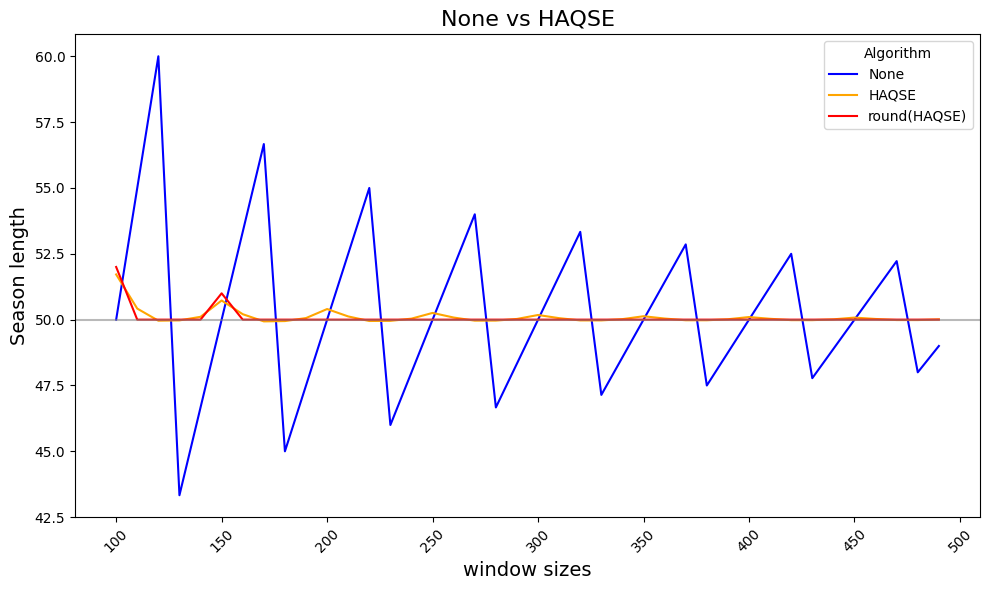

In [3]:
plt.figure(figsize=(10, 6))
 
plt.plot(window_sizes, none_results, linestyle='-', color='blue', label='Non-estimator')
plt.plot(window_sizes, haqse_results, linestyle='-', color='orange', label='HAQSE')
plt.plot(window_sizes, round_haqse_results, linestyle='-', color='red', label='round(HAQSE)')
plt.yticks(range(40, 61, 2)) 
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.55)
plt.title('None vs HAQSE', fontsize=16)
plt.xlabel('window sizes', fontsize=14)
plt.ylabel('Season length', fontsize=14) 
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()